In [77]:
import pandas as pd
import numpy as np
import keras as kr

data = pd.read_csv('earthquakes_scaled_class.csv', index_col="index")

data = data.drop("index.1", axis=1)

data

,magnitude,time,updated,felt,cdi,mmi,tsunami,sig,nst,dmin,...,gap,magType,depth,latitude,longitude,distanceKM,continent,country,subnational,city
index,,,,,,,,,,,,,,,,,,,,,
us6000lcz2,5,-0.815799,-0.977412,-0.083333,-0.6,-1.0,0.0,0.000000,0.491667,1.290504,...,0.105263,0.25,0.000000,-0.126122,0.902897,-0.804348,0.5,0.275862,0.129630,0.234432
us6000n9xs,4,0.289580,0.000423,-0.083333,-0.6,0.0,0.0,-0.919014,-0.608333,-0.232505,...,1.526316,-0.75,0.001914,0.000000,-0.153676,0.369565,0.0,0.000000,0.000000,0.000000
tx2024mydx,4,0.289510,0.349996,-0.083333,-0.6,0.0,0.0,-0.838028,-0.583333,-0.295730,...,0.315789,-0.75,-0.149192,0.000098,-0.153676,0.369565,0.0,0.000000,0.000000,0.000000
us6000n9xf,4,0.289510,0.000343,-0.083333,-0.6,0.0,0.0,-0.799296,-0.608333,-0.228936,...,1.657895,-0.75,-0.043131,0.000601,-0.153707,0.391304,0.0,0.000000,0.000000,0.000000
nn00880145,4,0.278268,0.311118,-0.083333,-0.6,-1.0,0.0,-0.919014,-0.775000,0.137667,...,0.022105,-0.75,-0.092003,0.580415,-0.207513,-0.086957,0.0,0.000000,-0.666667,-2.021978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ci40731623,5,0.580644,0.377703,774.583333,0.4,1.0,1.0,1.299296,0.358333,-0.330208,...,1.368421,-0.50,0.049682,0.180617,-0.216912,-0.673913,0.0,0.000000,-1.555556,-0.952381
ci40699207,4,0.455449,0.368965,1009.375000,0.4,1.0,1.0,1.362676,0.750000,-0.329897,...,-0.657895,-0.50,0.036065,0.181669,-0.214216,-0.717391,0.0,0.000000,-1.555556,-0.952381
ci40699207,4,0.455449,0.368965,1009.375000,0.4,1.0,1.0,1.362676,0.750000,-0.329897,...,-0.657895,-0.50,0.036065,0.181669,-0.214216,-0.717391,0.0,0.000000,-1.555556,-0.952381


In [78]:
data["magnitude"] = data["magnitude"].map(lambda x: x - 3)
data

,magnitude,time,updated,felt,cdi,mmi,tsunami,sig,nst,dmin,...,gap,magType,depth,latitude,longitude,distanceKM,continent,country,subnational,city
index,,,,,,,,,,,,,,,,,,,,,
us6000lcz2,2,-0.815799,-0.977412,-0.083333,-0.6,-1.0,0.0,0.000000,0.491667,1.290504,...,0.105263,0.25,0.000000,-0.126122,0.902897,-0.804348,0.5,0.275862,0.129630,0.234432
us6000n9xs,1,0.289580,0.000423,-0.083333,-0.6,0.0,0.0,-0.919014,-0.608333,-0.232505,...,1.526316,-0.75,0.001914,0.000000,-0.153676,0.369565,0.0,0.000000,0.000000,0.000000
tx2024mydx,1,0.289510,0.349996,-0.083333,-0.6,0.0,0.0,-0.838028,-0.583333,-0.295730,...,0.315789,-0.75,-0.149192,0.000098,-0.153676,0.369565,0.0,0.000000,0.000000,0.000000
us6000n9xf,1,0.289510,0.000343,-0.083333,-0.6,0.0,0.0,-0.799296,-0.608333,-0.228936,...,1.657895,-0.75,-0.043131,0.000601,-0.153707,0.391304,0.0,0.000000,0.000000,0.000000
nn00880145,1,0.278268,0.311118,-0.083333,-0.6,-1.0,0.0,-0.919014,-0.775000,0.137667,...,0.022105,-0.75,-0.092003,0.580415,-0.207513,-0.086957,0.0,0.000000,-0.666667,-2.021978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ci40731623,2,0.580644,0.377703,774.583333,0.4,1.0,1.0,1.299296,0.358333,-0.330208,...,1.368421,-0.50,0.049682,0.180617,-0.216912,-0.673913,0.0,0.000000,-1.555556,-0.952381
ci40699207,1,0.455449,0.368965,1009.375000,0.4,1.0,1.0,1.362676,0.750000,-0.329897,...,-0.657895,-0.50,0.036065,0.181669,-0.214216,-0.717391,0.0,0.000000,-1.555556,-0.952381
ci40699207,1,0.455449,0.368965,1009.375000,0.4,1.0,1.0,1.362676,0.750000,-0.329897,...,-0.657895,-0.50,0.036065,0.181669,-0.214216,-0.717391,0.0,0.000000,-1.555556,-0.952381


In [79]:
variables_despues_analisis = [
    "felt",         # Número de personas que reportan haber sentido el terremoto
    "cdi",          # Community Determined Intensity
    "mmi",          # Modified Mercalli Intensity
    "alert",        # Nivel de alerta
    "status",       # Estado revisado o automático
    "sig",          # Significancia del terremoto
    "ids",          # IDs de eventos relacionados
    "sources",      # Fuentes de los datos
    "types",        # Tipos de eventos asociados
    "nst",          # Número de estaciones que registraron el evento
    "dmin",         # Distancia mínima al evento
    "rms",          # RMS de la señal
    "gap",          # Brecha de datos entre estaciones
    "magType",      # Tipo de magnitud
    "distanceKM",   # Distancia a áreas pobladas en kilómetros
    "placeOnly",    # Si solo se tiene información del lugar
    "locationDetails" # Detalles adicionales de la ubicación
]

for var in variables_despues_analisis:
    try:
        data = data.drop(var, axis=1)
    except:
        pass

data

,magnitude,time,updated,tsunami,depth,latitude,longitude,continent,country,subnational,city
index,,,,,,,,,,,
us6000lcz2,2,-0.815799,-0.977412,0.0,0.000000,-0.126122,0.902897,0.5,0.275862,0.129630,0.234432
us6000n9xs,1,0.289580,0.000423,0.0,0.001914,0.000000,-0.153676,0.0,0.000000,0.000000,0.000000
tx2024mydx,1,0.289510,0.349996,0.0,-0.149192,0.000098,-0.153676,0.0,0.000000,0.000000,0.000000
us6000n9xf,1,0.289510,0.000343,0.0,-0.043131,0.000601,-0.153707,0.0,0.000000,0.000000,0.000000
nn00880145,1,0.278268,0.311118,0.0,-0.092003,0.580415,-0.207513,0.0,0.000000,-0.666667,-2.021978
...,...,...,...,...,...,...,...,...,...,...,...
ci40731623,2,0.580644,0.377703,1.0,0.049682,0.180617,-0.216912,0.0,0.000000,-1.555556,-0.952381
ci40699207,1,0.455449,0.368965,1.0,0.036065,0.181669,-0.214216,0.0,0.000000,-1.555556,-0.952381
ci40699207,1,0.455449,0.368965,1.0,0.036065,0.181669,-0.214216,0.0,0.000000,-1.555556,-0.952381


In [80]:
from imblearn.over_sampling import SMOTE as smote
from sklearn.model_selection import train_test_split

from collections import Counter
print("Distribución original de las clases:", Counter(data["magnitude"]))

# Dividir en conjunto de entrenamiento y conjunto de prueba
train, test = train_test_split(data, test_size=0.15, random_state=42)

train_x = train.drop("magnitude", axis=1)
train_y = train["magnitude"]

test_x = test.drop("magnitude", axis=1)
test_y = test["magnitude"]

# Ver la distribución de clases en el conjunto de entrenamiento antes de aplicar SMOTE
print("Distribución de clases en entrenamiento antes de SMOTE:", Counter(train_y))
print("Distribución de clases en entrenamiento antes de SMOTE:", Counter(test_y))

# Aplicar SMOTE en el conjunto de entrenamiento para balancear las clases
smote = smote(random_state=42, k_neighbors=2)
X_train_smote, y_train_smote = smote.fit_resample(train_x, train_y)
X_test_smote, y_test_smote = smote.fit_resample(test_x, test_y)

# Ver la distribución de clases después de aplicar SMOTE
print("Distribución de clases en entrenamiento después de SMOTE:", Counter(y_train_smote))
print("Distribución de clases en entrenamiento después de SMOTE:", Counter(y_test_smote))

Distribución original de las clases: Counter({3: 389, 1: 323, 2: 267, 0: 128, 4: 24, 5: 5})
Distribución de clases en entrenamiento antes de SMOTE: Counter({3: 330, 1: 282, 2: 222, 0: 105, 4: 21, 5: 5})
Distribución de clases en entrenamiento antes de SMOTE: Counter({3: 59, 2: 45, 1: 41, 0: 23, 4: 3})
Distribución de clases en entrenamiento después de SMOTE: Counter({3: 330, 0: 330, 1: 330, 2: 330, 4: 330, 5: 330})
Distribución de clases en entrenamiento después de SMOTE: Counter({1: 59, 3: 59, 2: 59, 4: 59, 0: 59})


In [81]:
model = kr.models.Sequential()

model.add(kr.layers.Dense(50, input_dim=10, activation="relu", kernel_initializer="he_normal"))
model.add(kr.layers.BatchNormalization())
model.add(kr.layers.Dense(150, activation="relu", kernel_initializer="he_normal"))
model.add(kr.layers.BatchNormalization())
model.add(kr.layers.Dense(200, activation="elu", kernel_initializer="he_normal"))
model.add(kr.layers.Dropout(0.2))
model.add(kr.layers.BatchNormalization())
model.add(kr.layers.Dense(400, activation="relu", kernel_initializer="he_normal"))
model.add(kr.layers.BatchNormalization())
model.add(kr.layers.Dense(400, activation="relu", kernel_initializer="he_normal"))
model.add(kr.layers.BatchNormalization())
model.add(kr.layers.Dense(200, activation="elu", kernel_initializer="he_normal"))
model.add(kr.layers.BatchNormalization())
model.add(kr.layers.Dense(6, activation="softmax", kernel_initializer="he_normal"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

C:\Users\mario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
history = model.fit(train_x, pd.get_dummies(train_y), epochs=3000, batch_size=48)

Epoch 1/3000
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4467 - loss: 1.5627
Epoch 2/3000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6000 - loss: 0.9971
Epoch 3/3000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6293 - loss: 0.8680
Epoch 4/3000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6511 - loss: 0.7717
Epoch 5/3000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6778 - loss: 0.7684
Epoch 6/3000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6636 - loss: 0.7274
Epoch 7/3000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6891 - loss: 0.7770
Epoch 8/3000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7080 - loss: 0.6479
Epoch 9/3000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7302 - loss: 0.6276
Epoch 10/3000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7345 - loss: 0.6083
Epoch 11/3000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7063 - loss: 0.6407
Epoch 12/3000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

(0.0, 1.0)

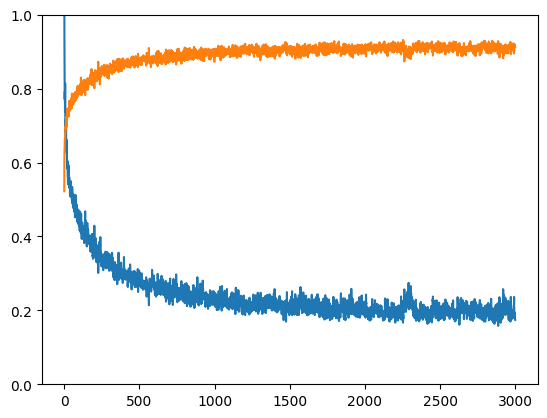

In [88]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])
plt.ylim(0, 1)

In [89]:
predictions = model.predict(X_test_smote)

predictions = np.argmax(predictions, axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [90]:
predictions

array([1, 3, 3, 4, 2, 1, 3, 2, 1, 1, 3, 2, 3, 1, 1, 4, 1, 2, 2, 3, 2, 1,
       3, 1, 1, 0, 1, 2, 3, 2, 2, 3, 3, 3, 3, 1, 0, 1, 1, 3, 3, 1, 3, 3,
       3, 2, 2, 3, 1, 2, 3, 3, 2, 2, 3, 3, 0, 0, 2, 3, 2, 2, 1, 3, 2, 2,
       1, 3, 3, 3, 2, 2, 2, 0, 2, 1, 4, 1, 0, 3, 3, 1, 3, 3, 0, 3, 2, 3,
       2, 3, 2, 3, 3, 1, 2, 1, 2, 2, 3, 3, 1, 1, 1, 0, 1, 1, 3, 1, 3, 3,
       4, 1, 3, 2, 3, 2, 3, 3, 1, 1, 2, 1, 2, 0, 3, 2, 0, 1, 0, 1, 3, 2,
       2, 3, 3, 3, 1, 4, 0, 3, 3, 2, 2, 2, 3, 1, 1, 3, 1, 3, 1, 1, 0, 3,
       2, 1, 2, 1, 0, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 2, 3, 2, 4, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 4, 4, 4,
       2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 4,
       4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2,
       2, 4, 2, 4, 2, 2, 4, 4, 2], dtype=int64)

In [91]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test_smote, predictions)
conf_matrix

array([[42, 16,  1,  0,  0],
       [ 2, 56,  1,  0,  0],
       [ 0,  2, 39, 17,  1],
       [ 0,  0, 10, 47,  2],
       [ 0,  0, 19,  0, 40]], dtype=int64)

In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_test_smote, predictions))

              precision    recall  f1-score   support

           0       0.95      0.71      0.82        59
           1       0.76      0.95      0.84        59
           2       0.56      0.66      0.60        59
           3       0.73      0.80      0.76        59
           4       0.93      0.68      0.78        59

    accuracy                           0.76       295
   macro avg       0.79      0.76      0.76       295
weighted avg       0.79      0.76      0.76       295

